### *План:*

- ***1. Изучение общей информации*** 

 - [Загрузка библиотек, чтение и изучение файлов с данными, ознакомление, получение общей информации](#Link1)


- ***2. Предобработка данных***

 - [Замена названий столбцов, типов данных, поиск пропусков и дубликатов](#Link2)
 
 
- ***3. Исследовательский анализ данных***

 - [Количественные признаки](#Link3)
   - Изучение аномалий, выбросов, распределений признаков. Построение boxplot’ов и гистрограмм
   - Изучение взаимосвязи между признаками. Построение матрицы корреляций
 - [Категориальные признаки](#Link4)
   - Построение столбчатых диаграмм
   - Исследование баланса классов целевого признака
   
   
- ***4. Подготовка признаков для построения модели***  

 - [Подготовка признаков](#Link5)
   - Кодирование категориальных признаков
   - Разделение датасета на обучающую и тестовую выборки
   - Масштабирование количественных признаков
 

- ***5. Обучение моделей***  

 - [Логистическая регрессия](#Link6)
 - [Дерево решений](#Link7)
 - [Случайный лес](#Link8)
 - [Градиентный бустинг](#Link9)
 

- ***6. Проверка лучшей модели на вменяемость*** 

 - [Проверка на вменяемость](#Link10)
 
 
- ***7. Общий вывод***

 - [Вывод](#Link11)

<a id='Link1'></a>

## 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from time import perf_counter

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

In [2]:
def print_df(df, df_name, title):
    """
    функция для вывода на экран датасетов
    
    параметры: DF, название DF, заголовок
    """
    
    print('\nДатасет ' + df_name + ': ' + title)
    display(df.head(5))    
    print('\nИнфо по датасету ' + df_name + ':\n')
    display(df.info())

In [3]:
# читаем файлы с данными
files = {'contract.csv': ['contract', 'Информация о договорах'],
         'personal.csv': ['personal', 'Персональные данные клиента'],
         'internet.csv': ['internet', 'Информация об интернет-услугах'],
         'phone.csv': ['phone', 'Информация об услугах телефонии']}

for file, df_name in files.items():
    locals()[df_name[0]] = pd.read_csv("Data/" + file)
    print_df(locals()[df_name[0]], df_name[0], df_name[1])


Датасет contract: Информация о договорах


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Инфо по датасету contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Датасет personal: Персональные данные клиента


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Инфо по датасету personal:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Датасет internet: Информация об интернет-услугах


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Инфо по датасету internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Датасет phone: Информация об услугах телефонии


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Инфо по датасету phone:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

### Вывод
 - Данные соответствуют описанию
 - Явных пропусков в каждом из датасетов не наблюдаем
 - Приведем названия столбцов к нижнему регистру
 - Сделаем замену типов данных в столбцах `begindate`, `enddate`, `totalcharges`
 - Добавим новый столбец для целевого признака `enddate_target` со значениями 0 (абонент остался) и 1 (абонент ушел)
 - Объединим все данные в одну таблицу

<a id='Link2'></a>

## 2. Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [4]:
# приведем названия столбцов к нижнему регистру
contract.columns = contract.columns.str.lower()
personal.columns = personal.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

### Сделаем замену типов данных в столбцах `begindate`, `enddate`, `totalcharges`

In [5]:
# функция для замены типа данных
def fun_change_type(column, new_type):
    """
    функция для замены типов данных
    
    параметры: серия, новый тип данных
    возвращает серию с новым типом данных
    """
    
    # пробуем заменить на переданный в функцию тип
    try:
        # если новый тип - date
        if new_type == 'date':
            column = pd.to_datetime(column)
        # если новый тип - float
        elif new_type == 'float':
            column = pd.to_numeric(column)
        return column
    
    # если при замене типа возникла ошибка, выодим текст ошибки
    except Exception as err:
        print("\n !!!Ошибка в замене типа: {} с {} на {}. {:s}" \
              .format(column.name, column.dtype.name, new_type, repr(err)))
        
        return column

In [6]:
# меняем типы данных в стобцах begindate, enddate, totalcharges
contract.begindate = fun_change_type(contract.begindate, 'date')
contract.enddate = fun_change_type(contract.enddate, 'date')
contract.totalcharges = fun_change_type(contract.totalcharges, 'float')


 !!!Ошибка в замене типа: enddate с object на date. ParserError('Unknown string format: %s', 'No')

 !!!Ошибка в замене типа: totalcharges с object на float. ValueError('Unable to parse string " " at position 488')


 - **`enddate` - заменим `No` на `NaN`, а также посмотрим все строки со значением `totalcharges` = " "**

In [7]:
# смотрим все строки со значением totalcharges = " "
contract.query("totalcharges == ' '")

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


 - **В этих строках Дата подключения =  Дата выгрузки данных 01.02.2020. В `totalcharges` добавляется сумма `monthlycharges` только после прошедшего отчетного периода. То есть для тех, кто подключился 01.01.20, `totalcharges` = `monthlycharges`.
Для подключившися 01.02.20 установим `totalcharges` = 0**

In [8]:
# enddate - заменим No на NaN
# для подключившися 01.02.20 установим totalcharges = 0
contract = contract.replace({'enddate': {'No': np.nan},
                             'totalcharges': {' ': 0}})

# снова меняем типы данных
contract.enddate = fun_change_type(contract.enddate, 'date')
contract.totalcharges = fun_change_type(contract.totalcharges, 'float')

# проверяем
print('Инфо по датасету contract после замены типов данных:\n')
display(contract.info())

Инфо по датасету contract после замены типов данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


None

### Проверим и объединим данные

 - **Проверим на уникальность `customerid` во всех таблицах**

In [9]:
# проверим на уникальность customerid во всех таблицах
print('Количество уникальных customerid в {} с длиной датасета {} = {}'.
      format('contract', len(contract), contract.customerid.nunique()))
print('Количество уникальных customerid в {} с длиной датасета {} = {}'
      .format('personal', len(personal), personal.customerid.nunique()))
print('Количество уникальных customerid в {} с длиной датасета {} = {}'
      .format('internet', len(internet), internet.customerid.nunique()))
print('Количество уникальных customerid в {} с длиной датасета {} = {}'
      .format('phone', len(phone), phone.customerid.nunique()))

Количество уникальных customerid в contract с длиной датасета 7043 = 7043
Количество уникальных customerid в personal с длиной датасета 7043 = 7043
Количество уникальных customerid в internet с длиной датасета 5517 = 5517
Количество уникальных customerid в phone с длиной датасета 6361 = 6361


 - **Во всех таблицах одна строка соответствует одному `customerid`. Сделаем `customerid` ключом и соединим таблицы в одну**

In [10]:
# cделаем customerid ключом во всех таблицах
contract = contract.set_index('customerid')
personal = personal.set_index('customerid')
internet = internet.set_index('customerid')
phone = phone.set_index('customerid')

In [11]:
#  соединим все таблицы в одну
telecom = contract.join(personal, how='inner').join(internet, how='outer').join(phone, how='outer')
print('\nНовая объединенная таблица telecom размером', telecom.shape)
display(telecom.head(5))


Новая объединенная таблица telecom размером (7043, 19)


,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
customerid,,,,,,,,,,,,,,,,,,,
0002-ORFBO,2019-05-01,NaT,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No
0003-MKNFE,2019-05-01,NaT,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,No,DSL,No,No,No,No,No,Yes,Yes
0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,No


### Добавим новые столбцы

 - **Добавим новый столбец `Срок жизни абонента в днях`  = `enddate` - `begindate`. Там, где `enddate` = `NaN`, будем использовать `01.02.2020` (дата актуальности данных).**
 - **Создадим новый таргет-столбец `enddate_target` со значением 0 (где `enddate` = `NaN` - остался) и 1 (где `enddate` не пустая - ушел)**
 - **Добавим новый стобец `amount_extra` - количество дополнительных услуг**

In [12]:
# новый стобец lifetime_days
telecom['lifetime_days'] = (telecom.enddate.fillna(pd.to_datetime('2020.02.01')) - telecom.begindate).dt.days

# новый стобец enddate_target
telecom['enddate_target'] = np.where(telecom.enddate.isnull(), 0, 1)

# новый столбец количество доп услуг
telecom['amount_extra'] = np.array([np.where(telecom.streamingmovies == 'Yes', 1, 0),
                                    np.where(telecom.streamingtv == 'Yes', 1, 0),
                                    np.where(telecom.onlinesecurity == 'Yes', 1, 0),
                                    np.where(telecom.onlinebackup == 'Yes', 1, 0),
                                    np.where(telecom.deviceprotection == 'Yes', 1, 0),
                                    np.where(telecom.techsupport == 'Yes', 1, 0)
                                   ]).sum(axis=0)

print('\nДатасет telecom после добавления новых столбцов:\n')
display(telecom.head(5))


Датасет telecom после добавления новых столбцов:



,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,lifetime_days,enddate_target,amount_extra
customerid,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,2019-05-01,NaT,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,No,Yes,No,Yes,Yes,No,No,276,0,3
0003-MKNFE,2019-05-01,NaT,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,No,No,No,No,No,Yes,Yes,276,0,1
0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,No,No,Yes,No,No,No,No,122,1,1
0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,No,Yes,Yes,No,Yes,Yes,No,396,1,4
0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,No,No,No,Yes,Yes,No,No,91,1,2


**Удалим столбцы begindate и enddate**

In [13]:
# удалим столбцы begindate и enddate
telecom = telecom.drop(['begindate', 'enddate'], axis=1)

### Проверим и обработаем пропуски в новой объединенной таблице

In [14]:
# пропуски в telecom
telecom.isnull().sum()

type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
lifetime_days          0
enddate_target         0
amount_extra           0
dtype: int64

 - **У нас есть 1526 договоров без использования услуги доступа в интернет. Заменим `NaN` на `No` в колонках: `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies`.**
 - **Посмотрим, подключен ли интернет (и какой) на 682 договорах без услуги телефонии**

In [15]:
# какой интернет на договорах без услуги телефонии
print('На договорах без телефонии подключен интернет')
telecom.query("multiplelines != multiplelines").internetservice.value_counts()

На договорах без телефонии подключен интернет


DSL    682
Name: internetservice, dtype: int64

- **Предположим, что компания может предоставлять доступ в интернет по DSL без телефонной линии и оплаты за нее. Заменим `multiplelines` = `Nan` на `No_line`, то есть добавим категорию, что будет означать, что нет телефонной линии.**

In [16]:
# делаем замену пропусков
telecom = telecom.fillna({'internetservice': 'No', 'onlinesecurity': 'No', 'onlinebackup': 'No',
                           'deviceprotection': 'No', 'techsupport': 'No',
                           'streamingtv': 'No', 'streamingmovies': 'No',
                           'multiplelines': 'No_line'})

In [17]:
# проверяем пропуски
telecom.isnull().sum()

type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
gender              0
seniorcitizen       0
partner             0
dependents          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
multiplelines       0
lifetime_days       0
enddate_target      0
amount_extra        0
dtype: int64

### Проверим и обработаем дубликаты

**Создадим списки количественных и категориальных признаков**

In [18]:
# определим список количественных признаков
numeric_columns = ['monthlycharges', 'totalcharges', 'lifetime_days', 'amount_extra']
numeric_columns_names = ['Оплата в месяц', 'Оплата за все время', 'Срок жизни, дни', 'Количество доп. сервисов']
display('Количественные признаки: ', numeric_columns)

# определим список категориальных признаков
category_columns = ['type', 'paperlessbilling', 'paymentmethod', 'gender',
                    'seniorcitizen', 'partner', 'dependents', 'internetservice',
                    'onlinesecurity', 'onlinebackup', 'deviceprotection',
                    'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines']
category_columns_names = ['Тип оплаты', 'Электронный счет', 'Метод оплаты', 'Пол',
                          'Пожилой человек', 'Супружество', 'Дети', 'Интернет',
                          'Блокировка небезопасных сайтов', 'Облачное хранилище', 'Антивирус',
                          'Техническая поддержка', 'Стриминговое ТВ', 'Каталог фильмов',
                          'Несколько тел. линий']
display('Категориальные признаки: ', category_columns)

# определим целевой признак
target_column = 'enddate_target'
display('Целевой признак: ', target_column)

'Количественные признаки: '

['monthlycharges', 'totalcharges', 'lifetime_days', 'amount_extra']

'Категориальные признаки: '

['type',
 'paperlessbilling',
 'paymentmethod',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'multiplelines']

'Целевой признак: '

'enddate_target'

In [19]:
# идем по категориальным признакам и смотрим уникальные значения
# для определения наличия дубликатов по значению/смыслу в категориях
for col in category_columns:
    print('Уникальные значения столбца {}: '.format(col))
    print(telecom[col].unique())
    print()

Уникальные значения столбца type: 
['One year' 'Month-to-month' 'Two year']

Уникальные значения столбца paperlessbilling: 
['Yes' 'No']

Уникальные значения столбца paymentmethod: 
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Уникальные значения столбца gender: 
['Female' 'Male']

Уникальные значения столбца seniorcitizen: 
[0 1]

Уникальные значения столбца partner: 
['Yes' 'No']

Уникальные значения столбца dependents: 
['Yes' 'No']

Уникальные значения столбца internetservice: 
['DSL' 'Fiber optic' 'No']

Уникальные значения столбца onlinesecurity: 
['No' 'Yes']

Уникальные значения столбца onlinebackup: 
['Yes' 'No']

Уникальные значения столбца deviceprotection: 
['No' 'Yes']

Уникальные значения столбца techsupport: 
['Yes' 'No']

Уникальные значения столбца streamingtv: 
['Yes' 'No']

Уникальные значения столбца streamingmovies: 
['No' 'Yes']

Уникальные значения столбца multiplelines: 
['No' 'Yes' 'No_line']



- **По категориям дубликатов не наблюдаем**
- Дубликаты по строкам нет смысла проверять, так как у нас все строки с уникальными `customerid`

### Вывод
 - Привели названия столбцов к нижнему регистру
 - Сделали замену типов данных в столбцах `begindate`, `enddate`, `totalcharges`
 - Объединили все данные в одну таблицу `telecom`
 - Добавили новый столбец для целевого признака `enddate_target` со значениями 0 (абонент остался) и 1 (абонент ушел)
 - Добавили новый столбец `lifetime_days` - cрок жизни абонента в днях
 - Добавили новый столбец `amount_extra` - количество дополнительных услуг
 - Заменили пропуски в новой таблице `telecom`
 - Дубликатов не обнаружили

## 3. Исследовательский анализ данных

In [20]:
sns.set_context('paper')

In [21]:
def fun_ax(ax, plot, title, df=None,
           x=None, df_x_name=None, x_label=None,
           y=None, df_y_name=None, y_label=None,
           category=None, color=None,label=None,
           linestyle=None, fmt=''):
    
    """ функция для построения графиков

    параметры:
     - ax - subplot
     - plot - типа графика, который нужно построить
     - title - заголовок
     - df - DF
     - df_x - значения для оси X
     - df_x_name - название столбца в DF для оси X
     - x_label - название оси X
     - df_y - значения для оси Y
     - df_y_name - название столбца в DF для оси Y
     - y_label - название оси Y
     - category - столбец в DF, по которому нужно сделать группировку     
     - color - цвет
     - label - название для легенды
     - linestyle - тип линии
     - fmt - формат
     """
    
    # boxplot
    if plot == 'box':
        sns.boxplot(data=df, x=category, y=y,
                    palette='muted', order=[1,0])
    
    # гистограмма
    elif plot == 'hist':
        sns.histplot(data=df, x=df_x_name, hue=category,
                     kde=True, palette='muted',
                     hue_order=[1,0], linewidth=0)
        ax.grid(True)
    
    # если bar
    elif plot == 'bar':
        sns.barplot(x=x, y=y, hue=category, hue_order=[1,0])
    
    # скаттер-плот
    elif plot == 'scatter':
        sns.scatterplot(x=x, y=y, hue=category, color=color)
        
    # тепловая диаграмма
    elif plot == 'heat':
        sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns,
                    cmap='viridis', center=0, annot=True, fmt=fmt)
        
    # линейный график
    elif plot == 'plot':
        sns.lineplot(x=x, y=y, color=color, label=label, linestyle=linestyle)
    
    # украшение графика
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontsize=12)
        
    return None

<a id='Link3'></a>

### Анализ количественных признаков

### Изучим выбросы и аномалии. Посторим boxplot'ы и гистограммы с группировкой по целевому признаку

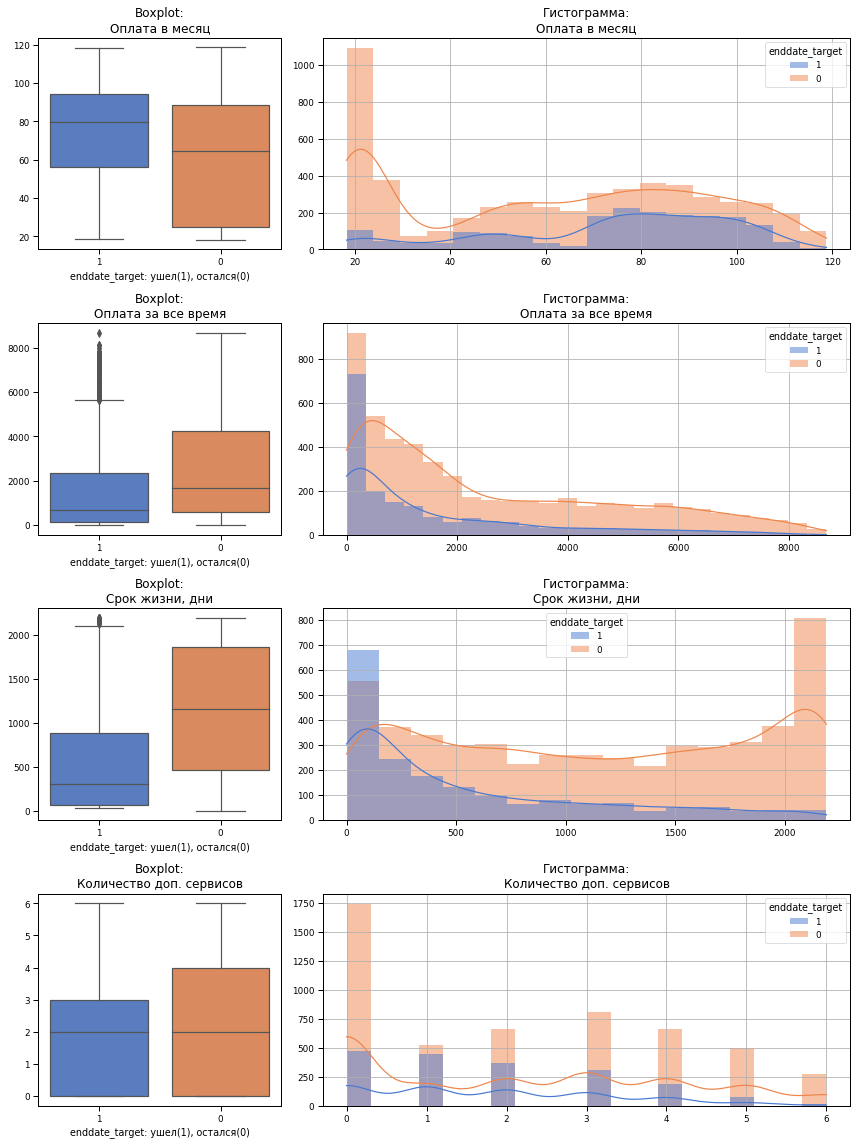

In [22]:
fig = plt.figure(figsize=(12,16))

# строим boxplot и hist по всем количественным признакам с группировкой по целевому признаку

# идем по списку количесвтенных признаков
for num_feature in range(0, len(numeric_columns)):
    
    # создаем subplot
    ax = plt.subplot2grid((4,3), (num_feature,0))
    # рисуем boxplot
    fun_ax(ax, 'box',
           'Boxplot:\n' + numeric_columns_names[num_feature],
            df=telecom,
            x_label='enddate_target: ушел(1), остался(0)',
            y=telecom[numeric_columns[num_feature]],
            category=telecom.enddate_target)
    
    # создаем subplot
    ax = plt.subplot2grid((4,3), (num_feature,1), colspan=2)
    # рисуем hist
    fun_ax(ax, 'hist',
           'Гистограмма:\n' + numeric_columns_names[num_feature],
           df=telecom,
           # название столбца, по которому строим гистограмму
           df_x_name=numeric_columns[num_feature],
           category=target_column)

fig.tight_layout()

 - ***Оплата в месяц***: 
   - Наблюдаем мультимодальность, возможно, это связано с наличием тарифной шкалы/сетки. При этом видим свечу около 20 для оставшихся клиентов. То есть те, кто остаются, пользуются в основном недорогими тарифными планами и платят немного.
   - БОльшая часть абонентов из тех, кто ушел, платили в месяц высокую плату.
   - Ушедшие платили очевидно больше, чем те, кто остался: 1 квартиль ушедших почти на уровне медианы по оставшимся. Медиана по оплате у ушедших выше, чем по оставшимся.
   

 - ***Оплата за все время***:
   - В гистограмме видим околонулевую свечу: те, кто ушли, заплатили оператору немного. Для оставшихся тоже есть такая же свеча, но это недавно пришедшие абоненты.
   - Boxplot подтверждает, что ушедшие оставили оператору немного денег за все время: выбросы начинаются от 6000. Медиана - практически около нуля.
   
   
 - ***Срок жизни в днях***:
   - Те, кто ушли, в основном пользовались услугами не больше 100 дней (3-4 месяца).
   - Среди оставшихся есть много тех, кто пользуется услугами около 2000 дней (около 5 лет). То есть, если всё-таки абоненты сохраняют лояльность, то это надолго.
   

- ***Количество доп. сервисов***:
   - Оставшиеся в основном не пользуются доп серсами (свеча около нуля)
   - Ушедшие в основном либо не пользуются доп сервисами, либо подключают 1 или 2 сервиса. Возможно, именно они для ушедших "утяжеляют" плату в месяц при том, что сами эти доп услуги им не особо нужны.


 - **Итого, ушедшие абоненты платили больше в месяц, но в целом оставили меньше денег за все время пользования услугами. И уходили они быстро: 25% уходили через 3-4 месяца, 50% - максимум через 10 месяцев. При этом у ушедших абонентов часто были подключены доп услуги, которые могли нежелательным образом увеличивать плату в месяц.**
 
 
 - *Грубых выбросов нет*

### Изучим взаимосвязи между количественными признаками. Построим тепловую диаграмму корреляции

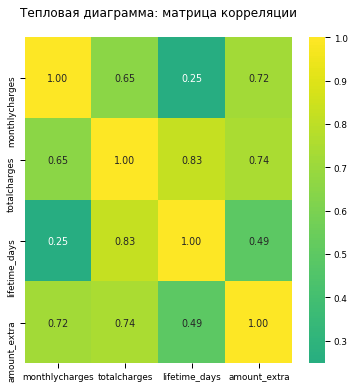

In [23]:
# строим тепловую диаграмму с корреляцией по всем количественным параметрам
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111) 
fun_ax(ax, 'heat', 'Тепловая диаграмма: матрица корреляции\n',
       df=telecom[numeric_columns].corr(),
       fmt='.2f')

 - **Видим мультиколлинеарность**. Новый столбец `lifetime_days` сильно коррелирует с `totalcharges`.
 - Также видим достаточно высокую корреляцию между `totalcharges` и `monthlycharges`, а также между `totalcharges` и `amount_extra` и между `monthlycharges` и `amount_extra`.
 - **Перед обучением моделей признаки `totalcharges` и `monthlycharges` удалим**.

<a id='Link4'></a>

### Анализ категориальных признаков

### Изучим категориальные признаки. Построим столбчатые диаграммы с группировкой по целевому признаку

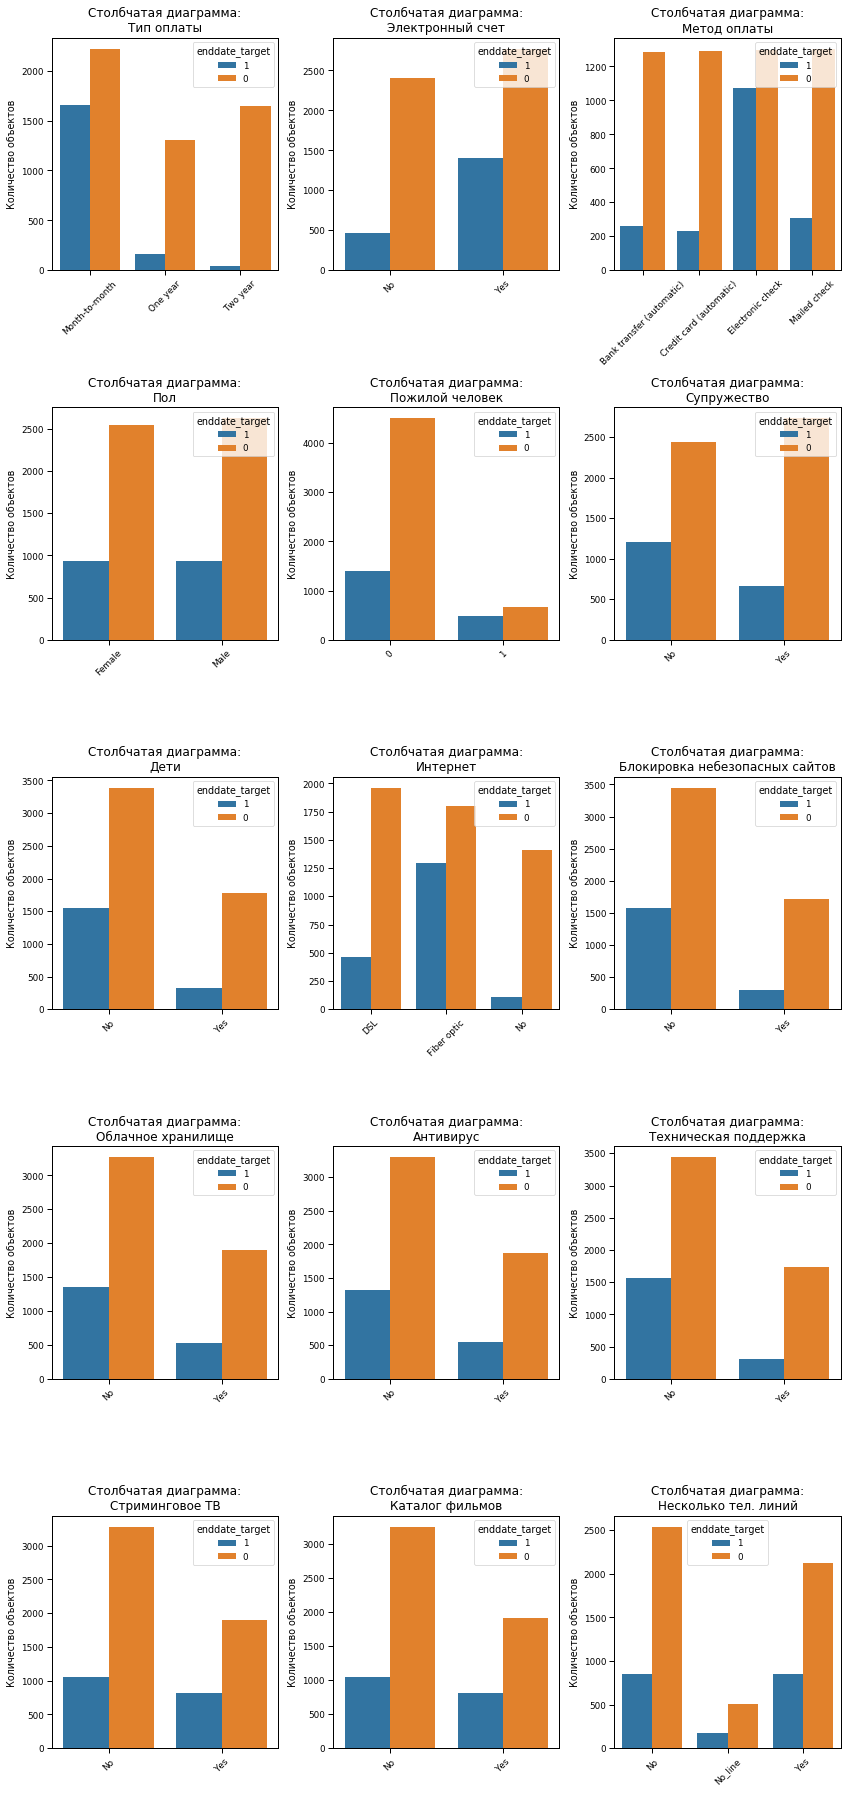

In [24]:
fig = plt.figure(figsize=(12,25))

# идем по списку категориальных признаков
for num_feature in range(0, len(category_columns)):
    
    # делаем группировку для построения столбчатых диаграмм
    df_group = telecom.groupby([category_columns[num_feature],
                                target_column], as_index=False).lifetime_days.count()

    # создаем subplot
    ax = plt.subplot(5,3,num_feature+1)
    # рисуем bar
    fun_ax(ax, 'bar',
           'Столбчатая диаграмма:\n' + category_columns_names[num_feature],
           x=df_group[category_columns[num_feature]],
           y=df_group.lifetime_days,
           y_label='Количество объектов', category=df_group[target_column])
    plt.xticks(rotation=45)

fig.tight_layout()    

 - ***Тип оплаты***: 
   - Ушедшие в основном платили помесячно. Оставшиеся разделяют предпочтения между всеми типами оплаты. Возможно, при оплате на 1 или 2 года есть весомые скидки. И те, кто ушел, вовремя об этих типах оплаты не узнали.
   - Есть предположение, что `monthlycharges` имеет мультимодальность в связи с типом оплаты `type`. И, возможно, именно по этой причине `monthlycharges` у оставшихся ниже, чем у ушедших: по причине использования типов оплаты на год и два со скидками.
   
   
 - ***Метод оплаты***: 
   - Примечательно, что ушедшие в основном пользовались методом оплаты `Electronic check`.
   
   
 - ***Пожилой человек***:
   - Среди ушедших ощутимую долю занимают пожилые люди.
   
   
 - Среди тех, кто ушел, больше **неженатых и без детей**.
   
   
 - ***Наличие интернета***:   
   - Среди ушедших много тех, кто пользовался оптоволокном. Возможно, они не знали о другом более дешевом способе подключения к сети интернет. Также среди ушедших мало тех, кто совсем не пользовался интернетом, при том, что среди оставшихся почти треть интернетом вообще не пользовалась.
   
   
 - **Итого ушедшие абоненты платили в основном помесячно, предпочитали метод оплаты `Electronic check`, многие пользовались оптоволокном. Возможно, они просто вовремя не узнали о других методах оплаты и других способах подключения к интернету**.

### Исследуем баланс классов

'Частота классов целевого признака датасета:'

0    0.73463
1    0.26537
Name: enddate_target, dtype: float64

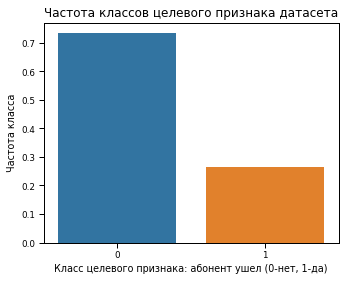

In [25]:
# частотa классов
class_frequency = telecom[target_column].value_counts(normalize=True)
display('Частота классов целевого признака датасета:', class_frequency)

# сроим столбчатый график для частот классов
fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)
# рисуем bar
fun_ax(ax, 'bar', 'Частота классов целевого признака датасета',
       x=class_frequency.index,
       x_label='Класс целевого признака: абонент ушел (0-нет, 1-да)',
       y=class_frequency,
       y_label='Частота класса')
fig.tight_layout()  

 - **Наблюдаем дисбаланс классов по всему датасету примерно 1:3**

 - **Рассмотрим, как меняется дисбаланс классов в зависимости от срока жизни `lifetime_days`**

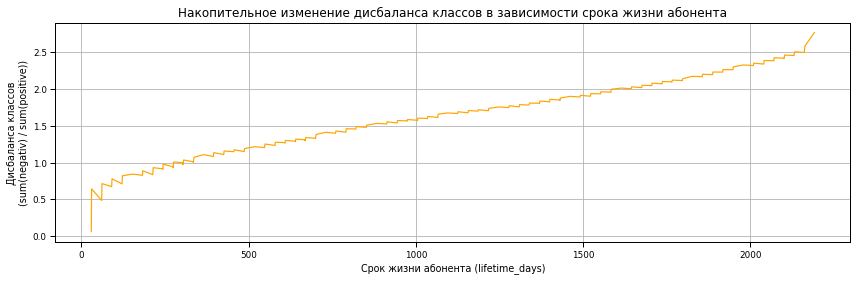

In [26]:
# строим линейный график по дисбалансу классов в зависимости от lifetime_days

# формируем список значений дисбаланса накопительно
fig = plt.figure(figsize=(12,4))

class_balance = []
for days in (telecom.lifetime_days.sort_values().unique()[1:]):
    class_balance.append(telecom.query("lifetime_days <= @days").enddate_target.value_counts()[0] /
                         telecom.query("lifetime_days <= @days").enddate_target.value_counts()[1])
ax = plt.subplot(111)
# рисуем plot
fun_ax(ax, 'plot', 'Накопительное изменение дисбаланса классов в зависимости срока жизни абонента',
        x=telecom.lifetime_days.sort_values().unique()[1:],
        x_label='Срок жизни абонента (lifetime_days)',
        y=np.array(class_balance),
        y_label='Дисбаланса классов\n(sum(negativ) / sum(positive))',
           color='orange')
plt.grid()

fig.tight_layout() 

 - Нулевой месяц не считаем. Это абоненты, которые подключились в момент выгрузки данных.
 - Для абонентов со сроком жизни до 3 месяцев дисбаланс в в сторону большей частоты класса 1 и меньшей частоты класса 0.
 - Для абонентов со сроком жизни до 1 года балансы классов примерно равны.
 - Далее начинается дисбаланс в сторону большей частоты класса 0 и меньшей частоты класса 1.

 - **Абоненты со сроком жизни до 3 месяцев с большей вероятностью могут покинуть оператора в любой момент. Здесь важно проводить с новичками работу, рассказывать им обо всех скидках, акциях, тарифах**.

### Вывод

 - **Ушедшие абоненты платили больше в месяц, но в целом оставили меньше денег за все время пользования услугами**. И **уходили они быстро**: 25% уходили через 3-4 месяца, 50% - максимум через 10 месяцев. При этом у ушедших абонентов часто были **подключены доп услуги**, которые могли нежелательным образом увеличивать плату в месяц.
 
  
 - **Ушедшие абоненты платили в основном помесячно**, предпочитали метод оплаты `Electronic check`, многие пользовались **оптоволокном**. Возможно, они просто **вовремя не узнали о других методах оплаты и других способах подключения к интернету**.
 
 
 - Обнаружили **дисбаланс классов** по всему датасету примерно 1:3.

 - **Абоненты со сроком жизни до 3 месяцев с большей вероятностью могут покинуть оператора в любой момент. Здесь важно проводить с новичками работу, рассказывать им обо всех скидках, акциях, тарифах**.

<a id='Link5'></a>

## 4.  Подготовка признаков для построения модели

 - **Удалим признаки `totalcharges` и `monthlycharges`**

In [27]:
# удалим столбцы begindate и enddate
telecom = telecom.drop(['totalcharges', 'monthlycharges'], axis=1)

### Переопределим список категориальных и количественных признаков

 - **Из категориальных признаков уберем `gender`, `partner`, `dependents`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies`**

In [28]:
# обновленный список категориальных признаков
category_columns = ['type', 'paperlessbilling', 'paymentmethod', 'seniorcitizen',
                    'internetservice', 'multiplelines']

# обновленный список количественных признаков
numeric_columns = ['lifetime_days', 'amount_extra']

### **Для категориальных признаков применим порядковое кодирование и прямое кодирование OHE**

 - **Создадим два списка с названиями закодированных категориальных признаков `category_columns_ordinal` и `category_columns_ohe`**

In [29]:
# определим список закодированных категориальных признаков
# методом Порядковое кодирование
print('Список закодированных категориальных признаков методом порядкового кодирования:')
category_columns_ordinal = [c + '_ordinal' for c in category_columns]
display(category_columns_ordinal)

# определим список закодированных категориальных признаков
# методом Прямое кодирование OHE
print('Список закодированных категориальных признаков методом прямого кодирования OHE определим после преобразования.')
category_columns_ohe = []

Список закодированных категориальных признаков методом порядкового кодирования:


['type_ordinal',
 'paperlessbilling_ordinal',
 'paymentmethod_ordinal',
 'seniorcitizen_ordinal',
 'internetservice_ordinal',
 'multiplelines_ordinal']

Список закодированных категориальных признаков методом прямого кодирования OHE определим после преобразования.


### Порядковое кодирование

In [30]:
# создем объкет для кодирования
encoder = OrdinalEncoder()
# преобразуем категориальные признаки

encoder.fit(telecom[category_columns])

# создаем новый DF с:
# - преобразованными категориальными признаками
# - оригинальными категориальными признаками
# - количественными признаками
telecom_coded = pd.concat([pd.DataFrame(encoder.transform(telecom[category_columns]),
                                        columns = category_columns_ordinal,
                                        index = telecom.index),
                           telecom[category_columns + numeric_columns + [target_column]]], axis=1)

# переводим в int все преобразованные категориальные признаки
for col in category_columns_ordinal:
    telecom_coded[col] = telecom_coded[col].astype('int64')

# переводим в category все оригинальные категориальные признаки
for col in category_columns:
    telecom_coded[col] = telecom_coded[col].astype('category')    

# проверяем типы данных
print('\nПроверяем типы данных категориальных признаков и закодированных категориальных признаков:\n')
print(telecom_coded[category_columns + category_columns_ordinal].dtypes)
    
# проверяем преобразование
print('\nПровели порядковое кодирование категориальных признаков. Проверим:\n')
print('telecom ДО преобразования категориальных признаков')
display(telecom_coded[category_columns].head(5))
print('\ntelecom ПОСЛЕ преобразования категориальных признаков')
display(telecom_coded[category_columns_ordinal].head(5))


Проверяем типы данных категориальных признаков и закодированных категориальных признаков:

type                        category
paperlessbilling            category
paymentmethod               category
seniorcitizen               category
internetservice             category
multiplelines               category
type_ordinal                   int64
paperlessbilling_ordinal       int64
paymentmethod_ordinal          int64
seniorcitizen_ordinal          int64
internetservice_ordinal        int64
multiplelines_ordinal          int64
dtype: object

Провели порядковое кодирование категориальных признаков. Проверим:

telecom ДО преобразования категориальных признаков


,type,paperlessbilling,paymentmethod,seniorcitizen,internetservice,multiplelines
customerid,,,,,,
0002-ORFBO,One year,Yes,Mailed check,0,DSL,No
0003-MKNFE,Month-to-month,No,Mailed check,0,DSL,Yes
0004-TLHLJ,Month-to-month,Yes,Electronic check,0,Fiber optic,No
0011-IGKFF,Month-to-month,Yes,Electronic check,1,Fiber optic,No
0013-EXCHZ,Month-to-month,Yes,Mailed check,1,Fiber optic,No



telecom ПОСЛЕ преобразования категориальных признаков


,type_ordinal,paperlessbilling_ordinal,paymentmethod_ordinal,seniorcitizen_ordinal,internetservice_ordinal,multiplelines_ordinal
customerid,,,,,,
0002-ORFBO,1,1,3,0,0,0
0003-MKNFE,0,0,3,0,0,2
0004-TLHLJ,0,1,2,0,1,0
0011-IGKFF,0,1,2,1,1,0
0013-EXCHZ,0,1,3,1,1,0


### Прямое кодирование OHE

In [31]:
# применяем OHE
telecom_ohe = pd.get_dummies(telecom[category_columns], drop_first=True)

# сохраняем список столбцов, закодированных через OHE, добавляем "_ohe"
category_columns_ohe = [c + '_ohe' for c in telecom_ohe.columns]
# обновляем названия столбцов в самом telecom_ohe
telecom_ohe.columns = category_columns_ohe

# добавляем telecom_ohe к telecom_coded
telecom_coded = telecom_coded.join(telecom_ohe)

print('Список закодированных категориальных признаков методом прямого кодирования OHE:')
display(category_columns_ohe)

# проверяем типы данных
print('\nПроверяем типы данных закодированных категориальных признаков:\n')
print(telecom_coded[category_columns_ohe].dtypes)
    
# проверяем преобразование
print('\nПровели прямое кодирование OHE категориальных признаков. Проверим:\n')
print('telecom ДО преобразования категориальных признаков')
display(telecom_coded[category_columns].head(5))
print('\ntelecom ПОСЛЕ преобразования категориальных признаков')
display(telecom_coded[category_columns_ohe].head(5))

Список закодированных категориальных признаков методом прямого кодирования OHE:


['seniorcitizen_ohe',
 'type_One year_ohe',
 'type_Two year_ohe',
 'paperlessbilling_Yes_ohe',
 'paymentmethod_Credit card (automatic)_ohe',
 'paymentmethod_Electronic check_ohe',
 'paymentmethod_Mailed check_ohe',
 'internetservice_Fiber optic_ohe',
 'internetservice_No_ohe',
 'multiplelines_No_line_ohe',
 'multiplelines_Yes_ohe']


Проверяем типы данных закодированных категориальных признаков:

seniorcitizen_ohe                            int64
type_One year_ohe                            uint8
type_Two year_ohe                            uint8
paperlessbilling_Yes_ohe                     uint8
paymentmethod_Credit card (automatic)_ohe    uint8
paymentmethod_Electronic check_ohe           uint8
paymentmethod_Mailed check_ohe               uint8
internetservice_Fiber optic_ohe              uint8
internetservice_No_ohe                       uint8
multiplelines_No_line_ohe                    uint8
multiplelines_Yes_ohe                        uint8
dtype: object

Провели прямое кодирование OHE категориальных признаков. Проверим:

telecom ДО преобразования категориальных признаков


,type,paperlessbilling,paymentmethod,seniorcitizen,internetservice,multiplelines
customerid,,,,,,
0002-ORFBO,One year,Yes,Mailed check,0,DSL,No
0003-MKNFE,Month-to-month,No,Mailed check,0,DSL,Yes
0004-TLHLJ,Month-to-month,Yes,Electronic check,0,Fiber optic,No
0011-IGKFF,Month-to-month,Yes,Electronic check,1,Fiber optic,No
0013-EXCHZ,Month-to-month,Yes,Mailed check,1,Fiber optic,No



telecom ПОСЛЕ преобразования категориальных признаков


,seniorcitizen_ohe,type_One year_ohe,type_Two year_ohe,paperlessbilling_Yes_ohe,paymentmethod_Credit card (automatic)_ohe,paymentmethod_Electronic check_ohe,paymentmethod_Mailed check_ohe,internetservice_Fiber optic_ohe,internetservice_No_ohe,multiplelines_No_line_ohe,multiplelines_Yes_ohe
customerid,,,,,,,,,,,
0002-ORFBO,0,1,0,1,0,0,1,0,0,0,0
0003-MKNFE,0,0,0,0,0,0,1,0,0,0,1
0004-TLHLJ,0,0,0,1,0,1,0,1,0,0,0
0011-IGKFF,1,0,0,1,0,1,0,1,0,0,0
0013-EXCHZ,1,0,0,1,0,0,1,1,0,0,0


### Разделим датасет на обучающую и тестовую выборки

In [32]:
# выделим фичи и целевой признак
features = telecom_coded.drop(target_column, axis=1)
target = telecom_coded[target_column]

# делам сплит на обучающую и тестовую выборки
# укажем stratify=target
train_features, test_features, train_target, test_target = \
            train_test_split(features, target, test_size=0.2,
                             shuffle=True,
                             random_state=12345, stratify=target)

# выводим размеры выборок
print('Длина исходного датасета:', len(telecom_coded))
print('Длина обучающей выборки:', len(train_features))
print('Длина тестовой выборки:', len(test_features))
print('Проверка общей длины обучающей + тестовой:', len(train_features) + len(test_features))

Длина исходного датасета: 7043
Длина обучающей выборки: 5634
Длина тестовой выборки: 1409
Проверка общей длины обучающей + тестовой: 7043


### Масштабируем количественные признаки

In [33]:
# масштабируем количественные признаки
    
display('Количественные признаки ДО масштабирования:',
        train_features[numeric_columns].head(5))
    
# создаем объект структуры StandardScaler() и настраиваем его на обучающих данных
scaler = StandardScaler()
scaler.fit(train_features[numeric_columns])

# масштабируем количественные признаки в обучающей выборке
train_features.loc[:, numeric_columns] = scaler.transform(train_features[numeric_columns])
    
# масштабируем количественные признаки в тестовой выборке
test_features.loc[:, numeric_columns] = scaler.transform(test_features[numeric_columns])
    
display('Количественные признаки ПОСЛЕ масштабирования:',
        train_features[numeric_columns].head(5))

'Количественные признаки ДО масштабирования:'

,lifetime_days,amount_extra
customerid,,
1816-FLZDK,31,1
5077-DXTCG,30,0
5519-NPHVG,365,2
0621-JFHOL,306,1
9700-ZCLOT,62,0


'Количественные признаки ПОСЛЕ масштабирования:'

,lifetime_days,amount_extra
customerid,,
1816-FLZDK,-1.274839,-0.556683
5077-DXTCG,-1.276176,-1.096688
5519-NPHVG,-0.828315,-0.016677
0621-JFHOL,-0.907192,-0.556683
9700-ZCLOT,-1.233396,-1.096688


### Вывод
- Закодировали категориальные признаки методами: порядковое кодирование и прямое кодирование OHE.
- Разделили исходные данные на обучающую и тестовую выборки.
- Масштабировали числовые признаки.

## 5. Построение моделей

In [34]:
def fun_build_model(model, model_name, parametrs,
                    features, target, cv, params_fit):
    """функция для построения модели,
    обучает модель, подбирает лучшие параметры,
    использует кросс-валидацию и скор = score_rmse
    
    параметры:
     - структура модели
     - наименование модели
     - словарь параметров, по которым нужно определить лучшую модель
     - список фичей
     - таргет
     - кол-во сплитов при кросс-валидации
     - параметры для обучения
    
    возвращает результат работы метода GridSearchCV
    """
    
    # передаем модель и параметры
    # метрика = roc_auc
    grid= GridSearchCV(model, parametrs,
                       scoring='roc_auc',
                       n_jobs=-1, cv=cv)
    
    # обучаем модель
    grid.fit(features, target, **params_fit)

    # выводим лучшую модель, лучшие параметры и лучший скор
    print('Лучшая модель {}:'.format(model_name))
    display(grid.best_estimator_)
    print('Лучшие параметры модели:')
    display(grid.best_params_)
    print('Лучший AUC_ROC: {}\n'.format(grid.best_score_.round(4)))
    # выводим время обучения полного датасета
    print('Время обучения полного обучающего датасета после получения лучших параметров: {:.3f} сек\n'
      .format(grid.refit_time_))
    
    # возвращаем grid
    return grid

In [35]:
def fun_check_by_test(model, model_name, features):
    """функция для проверки модели на тестовой выборке
    делает предсказания по переданной модели и
    рассчитывает auc_roc, accuracy, fpr, tpr,
    выводит ROC-кривую и матрицу ошибок
    
    параметры: модель, название модели, признаки для предсказания
    """
     
    # предсказания на тестовой выборке
    # засекаем время предсказания
    start_time = perf_counter()
    predictions = model.predict(features)
    stop_time = perf_counter()
    
    # вероятности получить класс 1
    probabilities_one = model.predict_proba(features)[:, 1]
    # метрика auc_roc
    auc_roc = roc_auc_score(test_target, probabilities_one)
    print('\nAUC_ROC на тестовой выборке: {:.4f}'.format(auc_roc))
    # метрика accuracy
    accuracy = accuracy_score(test_target, predictions)
    print('ACCURACY на тестовой выборке: {:.2f}\n'.format(accuracy))
    print('Время предсказания на тестовой выборке: {:.6f} s'.format(stop_time - start_time))
    
    # матрица ошибок
    confusion_matrix_df = pd.DataFrame(confusion_matrix(test_target, predictions),
                                       columns=['0','1'],
                                       index=['0', '1'])
   
    # получаем значения fpr, tpr в зависимости от thresholds
    fpr, tpr, thresholds = roc_curve(test_target, probabilities_one)
    
    # рисуем roc_curve и confusion_matrix
    fig = plt.figure(figsize=(10,3))

    ax = plt.subplot(121)
    # roc_curve
    fun_ax(ax, 'plot', 'ROC-кривая:\n',
           x=fpr, x_label='False Positive Rate',
           y=tpr, y_label='True Positive Rate = Recall',
           label='ROC curve (area = %0.2f)' % auc_roc,
           color='darkorange')
    
    # линия treshhold
    fun_ax(ax, 'plot', 'ROC-кривая:\n',
           x=[0, 1], y=[0, 1], color='navy', linestyle='dotted')
    plt.legend(loc="lower right")
    
    ax = plt.subplot(122)
    # confusion_matrix
    fun_ax(ax, 'heat', 'Матрица ошибок:\n',
           df=confusion_matrix_df, fmt='d')
       
    fig.tight_layout()

In [36]:
def features_importances(model, col_names, model_name):
    """функция для вывода весов признаков при построении модели
    
    на входе:
     - модель
    
    на выходе:
     - вывод весов признаков
    """
    
    # создаем DF из feature_importances модели
    feature_importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({'features': col_names, 'feature_importances': feature_importances})
   
    # рисуем bar
    fig = plt.figure(figsize=(10,4))
    ax = plt.subplot(111)
    fun_ax(ax, 'bar',
           'Веса признаков при построении модели {}\n'.format(model_name),
           x=feature_importances_df.sort_values('feature_importances', ascending=False).features,
           y=feature_importances_df.sort_values('feature_importances', ascending=False).feature_importances,
           x_label='Признаки', y_label='Веса')
    plt.xticks(rotation=90)
    fig.tight_layout()

In [37]:
def fun_build_LogisticRegression(train_features, train_target):
    """
    ф-ция для построения Логистическая регрессия
    используем закодированные категориальные признаки
    методом прямое кодирование OHE
    """
    
    # формируем параметры для поиска лучшей модели
    params_grid = {'C': np.arange(0.1, 10, 0.2),
                   'class_weight': ['balanced', None]}

    # строим модель
    grid_reg = fun_build_model(LogisticRegression(random_state=12345), 'Логистическая регрессия', params_grid,
                                                  train_features[category_columns_ohe + numeric_columns],
                                                  train_target, cv=5, params_fit={})
    
    # проверяем на тестовой выборке
    fun_check_by_test(grid_reg.best_estimator_, 'Логистическая регрессия',
                      test_features[category_columns_ohe + numeric_columns])
    
    return grid_reg

In [38]:
def fun_build_DecisionTreeClassifier(train_features, train_target):
    """
    ф-ция для построения Дерево решений
    используем закодированные категориальные признаки
    методом Порядковое кодирование
    """
    
    # формируем параметры для поиска лучшей модели
    params_grid = {'max_depth': range(1,52,2),
                   'min_samples_split': range(2,103,10),
                   'min_samples_leaf': range(1,62,5),
                   'class_weight': ['balanced', None]}

    # строим модель
    grid_tree = fun_build_model(DecisionTreeClassifier(random_state=12345), 'Дерево решений', params_grid,
                                train_features[category_columns_ordinal + numeric_columns],
                                train_target, cv=5, params_fit={})
    
    # проверяем на тестовой выборке
    fun_check_by_test(grid_tree.best_estimator_, 'Дерево решений',
                      test_features[category_columns_ordinal + numeric_columns])    
    
    # смотрим веса признаков при построении модели
    features_importances(grid_tree.best_estimator_,
                         category_columns_ordinal + numeric_columns,
                        'Дерево решений')
    
    return grid_tree

In [39]:
def fun_build_RandomForestClassifier(train_features, train_target):
    """
    ф-ция для построения Случайный лес
    передаем закодированные категориальные признаки
    методом Порядковое кодирование
    """
    
    # формируем параметры для поиска лучшей модели
    params_grid = {'max_depth': range(1,32,10),
                   'n_estimators': range(10,151,10),
                   'class_weight': ['balanced', None],
                   'criterion': ['gini', 'entropy']}

    # строим модель Случайный лес
    grid_forest = fun_build_model(RandomForestClassifier(random_state=1234), 'Случайный лес', params_grid,
                                                         train_features[category_columns_ordinal + numeric_columns],
                                                         train_target, cv=5, params_fit={})
    
    # проверяем на тестовой выборке
    fun_check_by_test(grid_forest.best_estimator_, 'Случайный лес',
                      test_features[category_columns_ordinal + numeric_columns])
    
    # смотрим веса признаков при построении модели
    features_importances(grid_forest.best_estimator_,
                         category_columns_ordinal + numeric_columns,
                         'Случайный лес')
    
    return grid_forest

In [40]:
def fun_build_XGBoostClassifier(train_features, train_target):
    """
    ф-ция для построения XgbClassifier
    передаем закодированные категориальные признаки
    методом Порядковое кодирование
    """
 
    # формируем параметры для обучения
    params_fit = {'verbose': 0}

    # формируем параметры для поиска лучшей модели
    params_grid = {'max_depth': range(1,11,1),
                   'eta': np.arange(0.1,1,0.1),
                   'scale_pos_weight': np.arange(1,2.1,0.5)}

    # формируем параметры для создания модели
    params_model = {'n_estimators': 500,
                    'random_state': 12345}
    
    # задаем модель XGBClassifier
    model_xgb = XGBClassifier(**params_model)

    # строим модель Градиентный бустинг
    grid_xgb = fun_build_model(model_xgb, 'Градиентный бустинг XGBoost', params_grid,
                               train_features[category_columns_ordinal + numeric_columns],
                               train_target, cv=5, params_fit=params_fit)

    # проверяем сразу на тесте
    fun_check_by_test(grid_xgb.best_estimator_,
                      'Градиентный бустинг XGBoost',
                      test_features[category_columns_ordinal + numeric_columns])

    # смотрим веса признаков при построении модели
    features_importances(grid_xgb.best_estimator_,
                         category_columns_ordinal + numeric_columns,
                        'Градиентный бустинг XGBoost')
    return grid_xgb

<a id='Link6'></a>

### Логистическая регрессия

Лучшая модель Логистическая регрессия:


LogisticRegression(C=1.3000000000000003, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Лучшие параметры модели:


{'C': 1.3000000000000003, 'class_weight': None}

Лучший AUC_ROC: 0.8369

Время обучения полного обучающего датасета после получения лучших параметров: 0.062 сек


AUC_ROC на тестовой выборке: 0.8514
ACCURACY на тестовой выборке: 0.80

Время предсказания на тестовой выборке: 0.003369 s
Wall time: 11.9 s


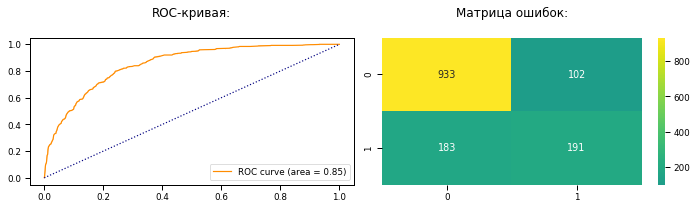

In [41]:
%%time
# Логистическая регрессия
grid_reg = fun_build_LogisticRegression(train_features, train_target)

<a id='Link7'></a>

### Дерево решений

Лучшая модель Дерево решений:


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=102,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

Лучшие параметры модели:


{'class_weight': 'balanced',
 'max_depth': 15,
 'min_samples_leaf': 21,
 'min_samples_split': 102}

Лучший AUC_ROC: 0.8573

Время обучения полного обучающего датасета после получения лучших параметров: 0.000 сек


AUC_ROC на тестовой выборке: 0.8594
ACCURACY на тестовой выборке: 0.77

Время предсказания на тестовой выборке: 0.001754 s
Wall time: 1min 30s


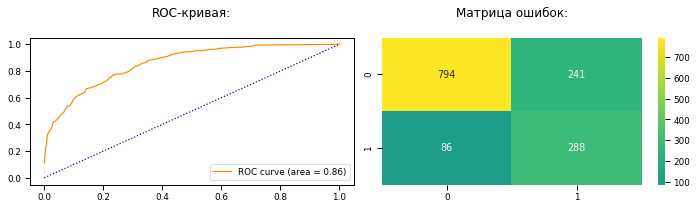

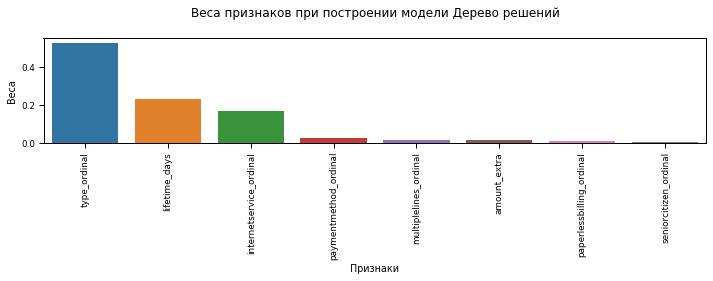

In [42]:
%%time
# Дерево решений
grid_tree = fun_build_DecisionTreeClassifier(train_features, train_target)

<a id='Link8'></a>

### Случайный лес

Лучшая модель Случайный лес:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

Лучшие параметры модели:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 11,
 'n_estimators': 110}

Лучший AUC_ROC: 0.8554

Время обучения полного обучающего датасета после получения лучших параметров: 0.421 сек


AUC_ROC на тестовой выборке: 0.8555
ACCURACY на тестовой выборке: 0.78

Время предсказания на тестовой выборке: 0.034357 s
Wall time: 1min 27s


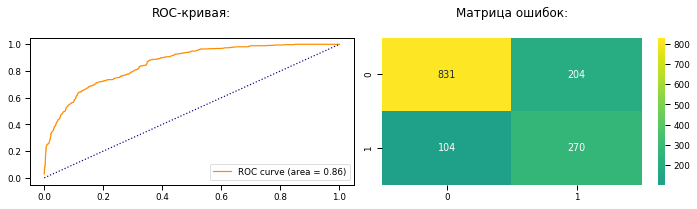

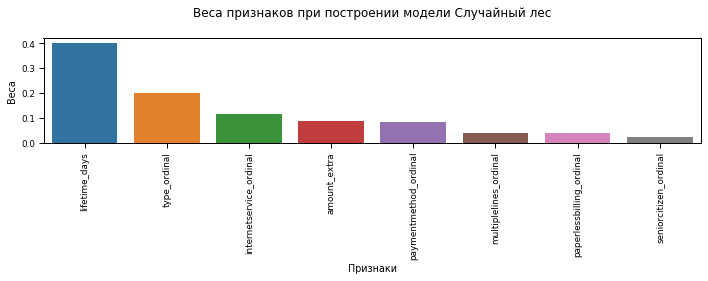

In [43]:
%%time
# Случайный лес
grid_forest = fun_build_RandomForestClassifier(train_features, train_target)

<a id='Link9'></a>

### Градиентный бустинг XGBoost

Лучшая модель Градиентный бустинг XGBoost:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.6, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.600000024, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=12345, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2.0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Лучшие параметры модели:


{'eta': 0.6, 'max_depth': 2, 'scale_pos_weight': 2.0}

Лучший AUC_ROC: 0.9442

Время обучения полного обучающего датасета после получения лучших параметров: 0.265 сек


AUC_ROC на тестовой выборке: 0.9596
ACCURACY на тестовой выборке: 0.90

Время предсказания на тестовой выборке: 0.006176 s
Wall time: 6min 30s


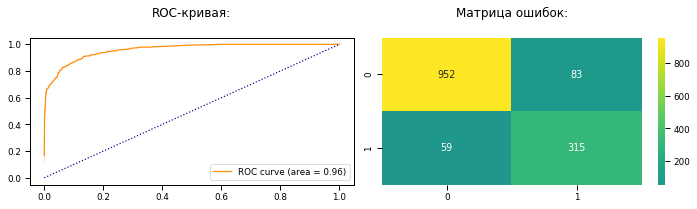

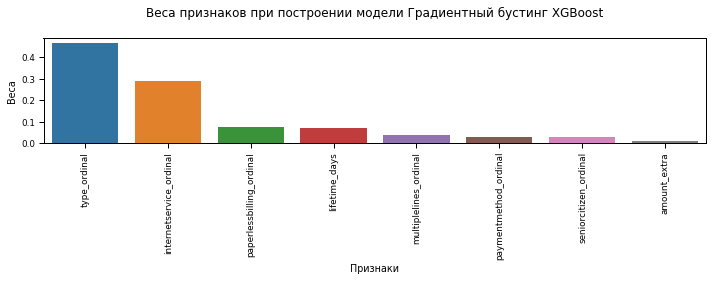

In [44]:
%%time
# Градиентный бустинг Xgboost
grid_xgb = fun_build_XGBoostClassifier(train_features, train_target)

### Вывод

- **Самая лучшая модель - XGBoostClassifier с `AUC_ROC` = 0,96 и `ACCURACY` = 0,9. Судя по матрице ошибок, эта модель отлично справляется с определением как положительных, так и отрицательных классов:** мы правильно отнесли к положительному классу 315 объектов (или 84,2% от TP) и 952 объекта (или 92% от TN) - к отрицательному классу. Конечно, 59 объектов (или 15,8% от TP) мы определили как FN, то есть с такими клиентами не будет проведена дополнительная работа, и они скорее всего уйдут. И 83 объекта (или 8% от TN) мы определили как FP, то есть таким клиентам будет предложена скидка или другие способы оптимизации затрат, хотя такие клиенты и не планируют уходить. Несмотря на это, модель дает хороший результат. И это должно помочь бизнесу удержать клиентов, которые планируют уйти.

<a id='Link10'></a>

## 6. Проверим лучшую модель на вменяемость

 - **Посчитаем `accuracy` константной модели, прогнозирующей самый частый класс 0**

In [45]:
# accuracy для константной модели
print('Accuracy константной модели на тестовой выборке: {:.3f}'.
      format(accuracy_score(test_target, np.zeros(len(test_target)))))

Accuracy константной модели на тестовой выборке: 0.735


 - **Лучшая модель прошла проверку на вменяемость**

<a id='Link11'></a>

## 7. Общий вывод

- **Изучили данные**.

 
- **Предобработали данные**.
 
 - Объединили все данные в одну таблицу `telecom`.
 - Добавили новый столбец для целевого признака `enddate_target` со значениями 0 (абонент остался) и 1 (абонент ушел).
 - Добавили новый столбец `lifetime_days` - cрок жизни абонента в днях.
 - Добавили новый столбец `amount_extra` - количество дополнительных услуг.
 - Заменили пропуски в новой таблице `telecom`.
 - Дубликатов не обнаружили.
 
 
- **Провели исследовательский анализ данных**.

 - **Ушедшие абоненты платили больше в месяц, но в целом оставили меньше денег за все время пользования услугами**. И **уходили они быстро**: 25% уходили через 3-4 месяца, 50% - максимум через 10 месяцев. При этом у ушедших абонентов часто были **подключены доп услуги**, которые могли нежелательным образом увеличивать плату в месяц.
  
 - **Ушедшие абоненты платили в основном помесячно**, предпочитали метод оплаты `Electronic check`, многие пользовались **оптоволокном**. Возможно, они просто **вовремя не узнали о других методах оплаты и других способах подключения к интернету**.
 
 - Обнаружили **дисбаланс классов** по всему датасету примерно 1:3.
 - Проверили взаимосвязь между дисбалансом классов и сроком жизни абонентов:
 
    - Для абонентов со сроком жизни до 3 месяцев дисбаланс в в сторону большей частоты класса 1 и меньшей частоты класса 0.
    - Для абонентов со сроком жизни до 1 года балансы классов примерно равны.
    - Далее начинается дисбаланс в сторону большей частоты класса 0 и меньшей частоты класса 1.
    - **Абоненты со сроком жизни до 3 месяцев с большей вероятностью могут покинуть оператора в любой момент. Здесь важно проводить с новичками работу, рассказывать им обо всех скидках, акциях, тарифах**.
 
 
 
- **Подготовили признаки для построения моделей** 

 - Закодировали категориальные признаки.
 - Подготовили обучающую и тестовую выборки.
 - Масштабировали числовые признаки .
 
 
- Построили модели: (Дерево решений, Случайный лес, Логистическая регрессия, Градиентный бустинг).

 - **Самая лучшая модель - XGBoostClassifier с `AUC_ROC` = 0,96 и `ACCURACY` = 0,9. Судя по матрице ошибок, эта модель отлично справляется с определением как положительных, так и отрицательных классов:** мы правильно отнесли к положительному классу 315 объектов (или 84,2% от TP) и 952 объекта (или 92% от TN) - к отрицательному классу. Конечно, 59 объектов (или 15,8% от TP) мы определили как FN, то есть с такими клиентами не будет проведена дополнительная работа, и они скорее всего уйдут. И 83 объекта (или 8% от TN) мы определили как FP, то есть таким клиентам будет предложена скидка или другие способы оптимизации затрат, хотя такие клиенты и не планируют уходить. Несмотря на это, модель дает хороший результат. И это должно помочь бизнесу удержать клиентов, которые планируют уйти.
  
  
- Проверили лучшую модель на вменяемость. Проверка пройдена.

 
- ***Вывод: Для прогнозирование оттока клиентов у Оператора связи порекомендуем модель XGBoostClassifier***.